<a href="https://colab.research.google.com/github/CesarSanchezA/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['Origen'] = 'tienda 1'
tienda2['Origen'] = 'tienda 2'
tienda3['Origen'] = 'tienda 3'
tienda4['Origen'] = 'tienda 4'

df_tienda1 = pd.DataFrame(tienda1)
df_tienda2 = pd.DataFrame(tienda2)
df_tienda3 = pd.DataFrame(tienda3)
df_tienda4 = pd.DataFrame(tienda4)

tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

df_tiendas = pd.DataFrame(tiendas)

df_tiendas

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Origen
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,tienda 4


In [ ]:
# Ingreso total por cada tienda

tienda_ingresos = df_tiendas.groupby('Origen')['Precio'].sum().reset_index(name='Ingresos')
tienda_ingresos.columns = ['Tienda', 'Ingresos']

df_ingreso = pd.DataFrame(tienda_ingresos)

print(df_ingreso.sort_values(by='Ingresos', ascending=False))

     Tienda      Ingresos
0  tienda 1  1.150880e+09
1  tienda 2  1.116344e+09
2  tienda 3  1.098020e+09
3  tienda 4  1.038376e+09


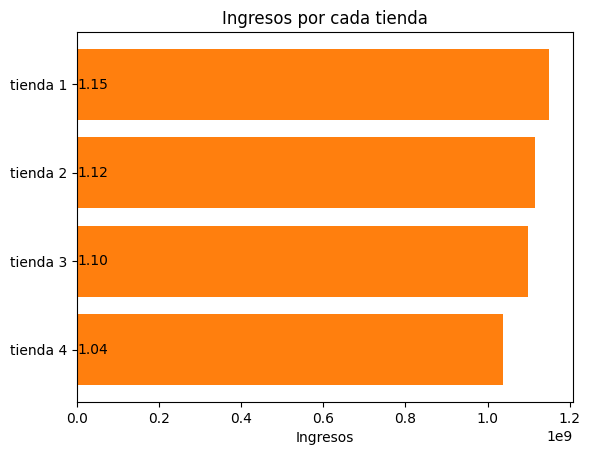

In [ ]:
tienda = df_ingreso['Tienda']
ingresos = df_ingreso['Ingresos']

fig, ax = plt.subplots()

rects = ax.barh(tienda, ingresos/1e9, align='center')

ax.bar_label(rects, fmt='%.2f')

ax.barh(tienda, ingresos, align='center')
ax.invert_yaxis()
ax.set_xlabel('Ingresos')
ax.set_title('Ingresos por cada tienda')

plt.show()

In [ ]:
# Función para los dataframes de categoría

def categoria(df):

  categoria = df.groupby('Categoría del Producto')['Categoría del Producto'].count().reset_index(name='Categoría')
  categoria.columns = ['Categoría', 'Cantidad']

  df_resultado = pd.DataFrame(categoria)

  categoria_resultado = df_resultado.Categoría
  cantidad_resultado = df_resultado.Cantidad

  return categoria_resultado, cantidad_resultado, df_resultado.sort_values("Cantidad", ascending=False)

In [ ]:
# Resultados de cada dataframe para poder hacer los gráficos

# Tienda 1
print("Tienda 1")
categoria_tienda_1, cantidad_tienda_1, df_resultado_1 = categoria(df_tienda1)
print(df_resultado_1)

# Tienda 2
print("\nTienda 2")
categoria_tienda_2, cantidad_tienda_2, df_resultado_2 = categoria(df_tienda2)
print(df_resultado_2)

# Tienda 3
print("\nTienda 3")
categoria_tienda_3, cantidad_tienda_3, df_resultado_3 = categoria(df_tienda3)
print(df_resultado_3)

# Tienda 4
print("\nTienda 4")
categoria_tienda_4, cantidad_tienda_4, df_resultado_4 = categoria(df_tienda4)
print(df_resultado_4)

Tienda 1
                 Categoría  Cantidad
7                  Muebles       465
3             Electrónicos       448
5                 Juguetes       324
2        Electrodomésticos       312
1     Deportes y diversión       284
4   Instrumentos musicales       182
6                   Libros       173
0  Artículos para el hogar       171

Tienda 2
                 Categoría  Cantidad
7                  Muebles       442
3             Electrónicos       422
5                 Juguetes       313
2        Electrodomésticos       305
1     Deportes y diversión       275
4   Instrumentos musicales       224
6                   Libros       197
0  Artículos para el hogar       181

Tienda 3
                 Categoría  Cantidad
7                  Muebles       499
3             Electrónicos       451
5                 Juguetes       315
2        Electrodomésticos       278
1     Deportes y diversión       277
6                   Libros       185
0  Artículos para el hogar       177
4   Instr

<ipython-input-6-3bdfb0db8b8f>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Categoría"], rotation=45, ha="right")
<ipython-input-6-3bdfb0db8b8f>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Categoría"], rotation=45, ha="right")
<ipython-input-6-3bdfb0db8b8f>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Categoría"], rotation=45, ha="right")
<ipython-input-6-3bdfb0db8b8f>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Categoría"], rotation=45, ha="right")


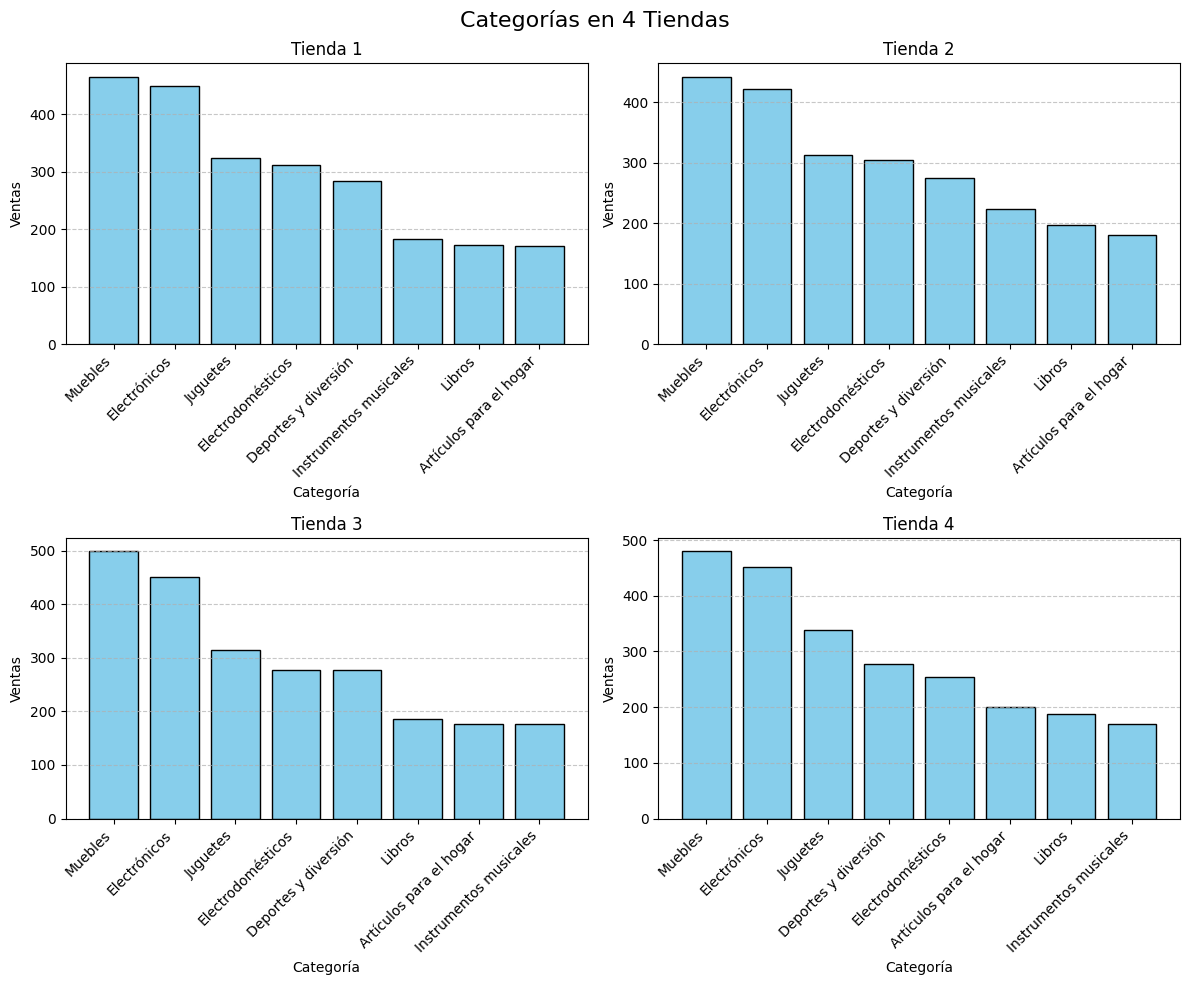

In [ ]:
# Gráfico de categorías
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Categorías en 4 Tiendas", fontsize=16)

tiendas = [df_resultado_1, df_resultado_2, df_resultado_3, df_resultado_4]
titulos = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, ax in enumerate(axs.flat):
    df = tiendas[i]
    ax.bar(df["Categoría"], df["Cantidad"], color="skyblue", edgecolor="black")
    ax.set_title(titulos[i])
    ax.set_xlabel("Categoría")
    ax.set_ylabel("Ventas")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xticklabels(df["Categoría"], rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [ ]:
# Calificaciones por cada tienda

tienda_satisfaccion = df_tiendas.groupby('Origen')['Calificación'].mean().reset_index(name='Calificación')
tienda_satisfaccion.columns = ['Tienda', 'Calificación']

df_satisfaccion = pd.DataFrame(tienda_satisfaccion)

df_ordenado_satisfaccion = df_satisfaccion.sort_values(by='Calificación', ascending=True)

print(df_ordenado_satisfaccion)

     Tienda  Calificación
0  tienda 1      3.976685
3  tienda 4      3.995759
1  tienda 2      4.037304
2  tienda 3      4.048326


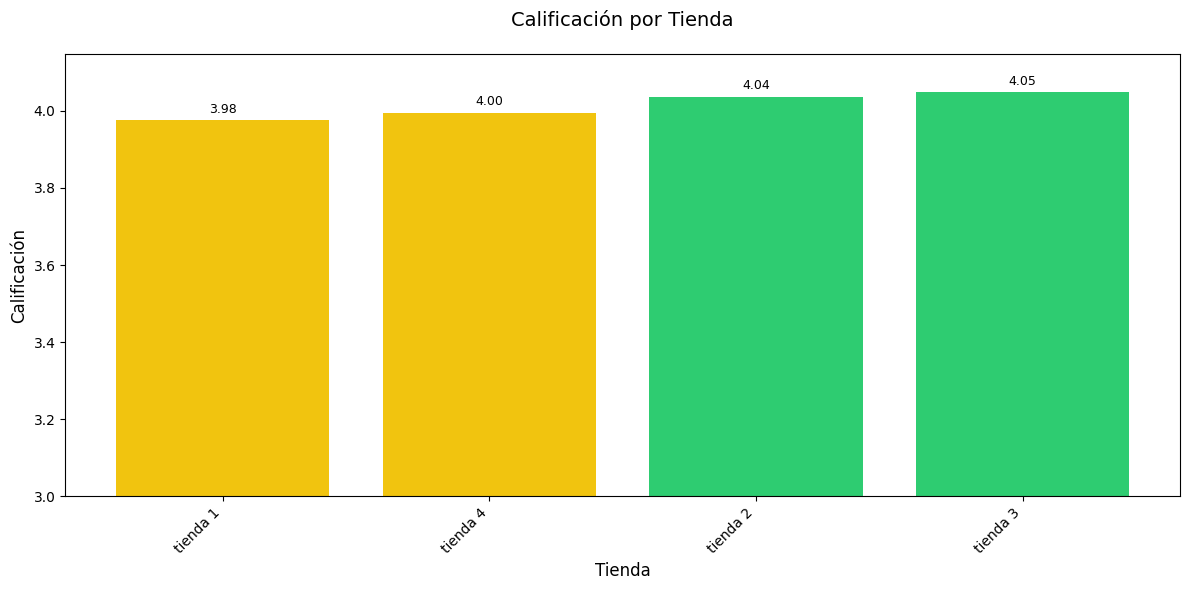

In [ ]:
tienda = df_ordenado_satisfaccion['Tienda']
calificacion = df_ordenado_satisfaccion['Calificación']

# Definir los rangos de colores
def color_por_calificacion(val):
    if val >= 4.0:  # Mejores calificaciones (verde)
        return '#2ecc71'  # Verde
    elif val >= 3.8:  # Calificaciones medias (amarillo)
        return '#f1c40f'  # Amarillo
    else:  # Peores calificaciones (rojo)
        return '#e74c3c'  # Rojo

colores = [color_por_calificacion(c) for c in calificacion]

fig, ax = plt.subplots(figsize=(12, 6))

rects = ax.bar(tienda, calificacion, color=colores, align='center')

ax.bar_label(rects, fmt='%.2f', padding=3, fontsize=9)

ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación', fontsize=12)
ax.set_title('Calificación por Tienda', pad=20, fontsize=14)
plt.ylim(3, max(calificacion)+0.1)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Función para los dataframes de mas vendidos
def funcion_producto(df):

  produ = df.groupby('Producto')['Producto'].count().reset_index(name='Prod')
  produ.columns = ['Prod', 'Cantidad']

  df_resultado = pd.DataFrame(produ)

  producto_resultado = df_resultado.Prod
  cantidad_resultado = df_resultado.Cantidad
  mayores = df_resultado.nlargest(5, 'Cantidad')
  menores = df_resultado.nsmallest(5, 'Cantidad')

  return producto_resultado, cantidad_resultado, df_resultado.sort_values(by='Cantidad', ascending=False), mayores, menores

In [ ]:
# Resultados de cada dataframe para poder hacer los gráficos

# Tienda 1
print("Tienda 1")
producto_tienda_1, cantidad_producto_tienda_1, df_resultado_producto_1, mayores_tienda_1, menores_tienda_1 = funcion_producto(df_tienda1)
print("Más vendidos")
print(mayores_tienda_1)

print("\n Menos vendidos")
print(menores_tienda_1)

# Tienda 2
print("\nTienda 2")
producto_tienda_2, cantidad_producto_tienda_2, df_resultado_producto_2, mayores_tienda_2, menores_tienda_2 = funcion_producto(df_tienda2)
print("Más vendidos")
print(mayores_tienda_2)

print("\n Menos vendidos")
print(menores_tienda_2)

# Tienda 3
print("\nTienda 3")
producto_tienda_3, cantidad_producto_tienda_3, df_resultado_producto_3, mayores_tienda_3, menores_tienda_3 = funcion_producto(df_tienda3)
print("Más vendidos")
print(mayores_tienda_3)

print("\n Menos vendidos")
print(menores_tienda_3)

# Tienda 4
print("\nTienda 4")
producto_tienda_4, cantidad_producto_tienda_4, df_resultado_producto_4, mayores_tienda_4, menores_tienda_4 = funcion_producto(df_tienda4)
print("Más vendidos")
print(mayores_tienda_4)

print("\n Menos vendidos")
print(menores_tienda_4)

Tienda 1
Más vendidos
                       Prod  Cantidad
1                   Armario        60
33               Microondas        60
48            TV LED UHD 4K        60
40         Secadora de ropa        58
9   Bloques de construcción        56

 Menos vendidos
                           Prod  Cantidad
4     Auriculares con micrófono        33
13                 Celular ABXY        33
37              Olla de presión        35
38                    Pandereta        36
14  Ciencia de datos con Python        39

Tienda 2
Más vendidos
                         Prod  Cantidad
24  Iniciando en programación        65
33                 Microondas        62
7                     Batería        61
21          Guitarra acústica        58
38                  Pandereta        58

 Menos vendidos
               Prod  Cantidad
26    Juego de mesa        32
23        Impresora        34
31  Mesa de comedor        34
44           Sillón        35
3       Auriculares        37

Tienda 3
Más vendido

<ipython-input-11-3a819429e865>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")
<ipython-input-11-3a819429e865>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")
<ipython-input-11-3a819429e865>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")
<ipython-input-11-3a819429e865>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")


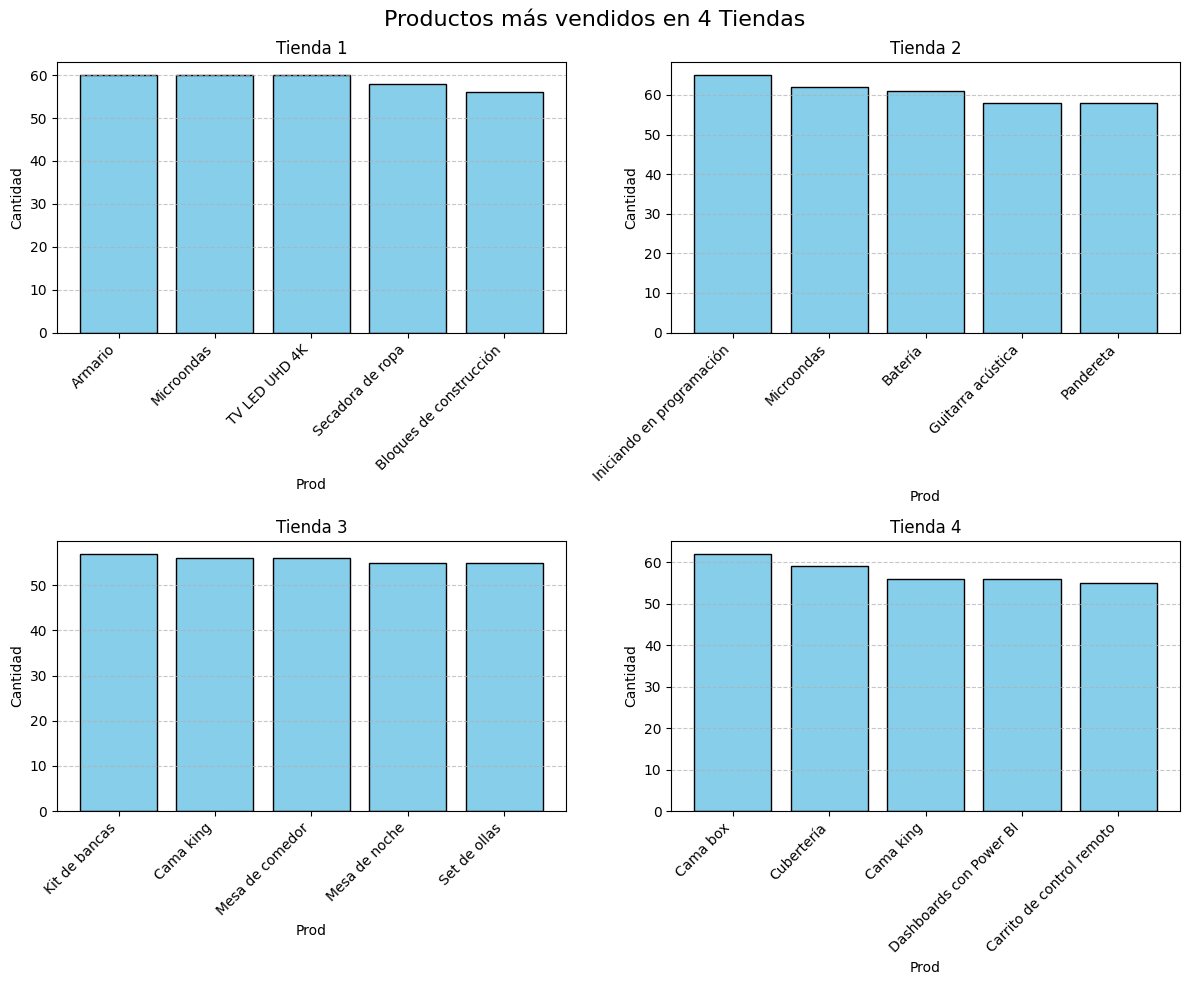

In [ ]:
# Gráfico de productos más vendidos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Productos más vendidos en 4 Tiendas", fontsize=16)

tiendas = [mayores_tienda_1, mayores_tienda_2, mayores_tienda_3, mayores_tienda_4]
titulos = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, ax in enumerate(axs.flat):
    df = tiendas[i]
    ax.bar(df["Prod"], df["Cantidad"], color="skyblue", edgecolor="black")
    ax.set_title(titulos[i])
    ax.set_xlabel("Prod")
    ax.set_ylabel("Cantidad")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xticklabels(df["Prod"], rotation=45, ha="right")

plt.tight_layout()
plt.show()

<ipython-input-12-e7483df9dd15>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")
<ipython-input-12-e7483df9dd15>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")
<ipython-input-12-e7483df9dd15>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")
<ipython-input-12-e7483df9dd15>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Prod"], rotation=45, ha="right")


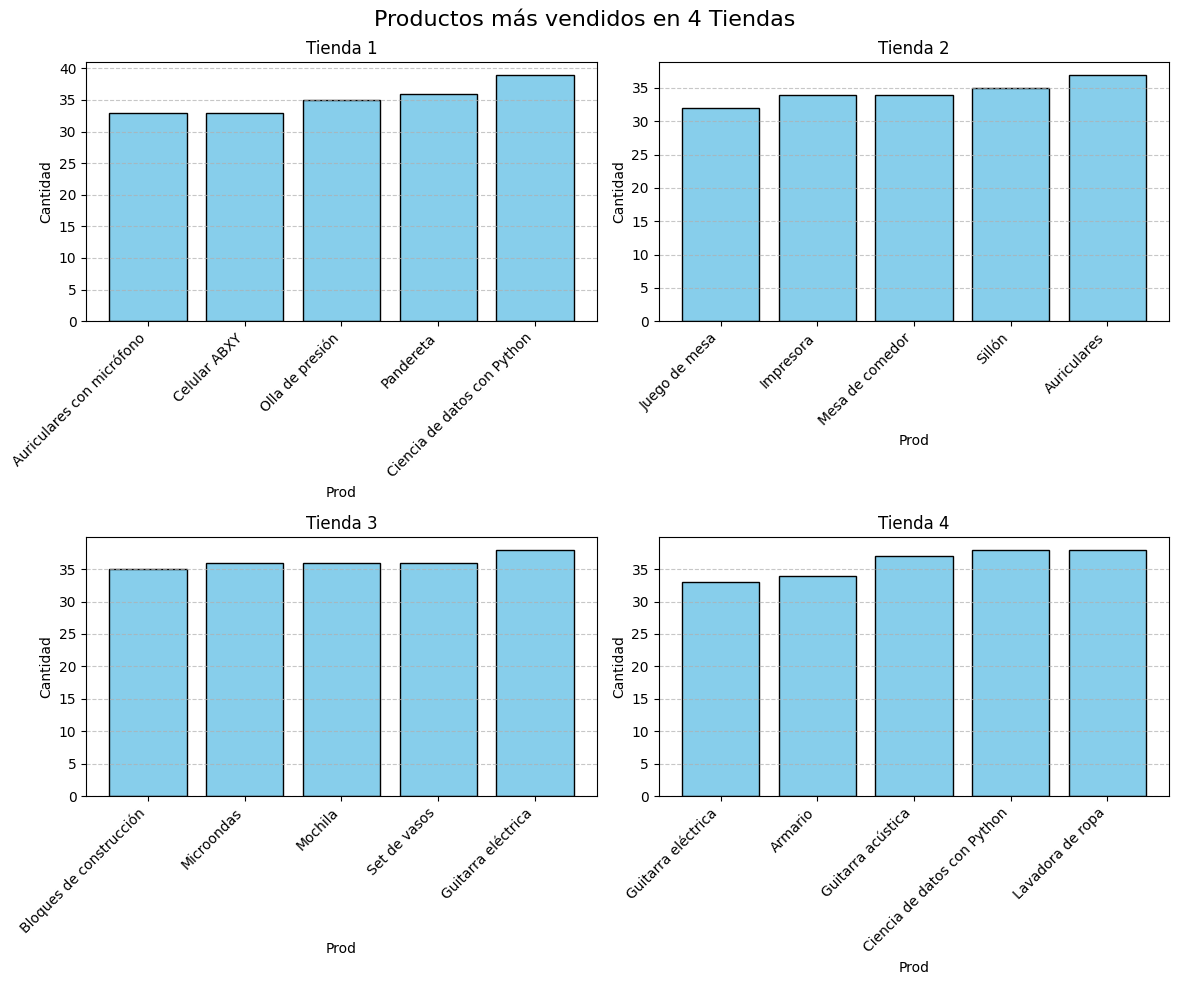

In [ ]:
# Gráfico de productos menos vendidos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Productos más vendidos en 4 Tiendas", fontsize=16)

tiendas = [menores_tienda_1, menores_tienda_2, menores_tienda_3, menores_tienda_4]
titulos = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, ax in enumerate(axs.flat):
    df = tiendas[i]
    ax.bar(df["Prod"], df["Cantidad"], color="skyblue", edgecolor="black")
    ax.set_title(titulos[i])
    ax.set_xlabel("Prod")
    ax.set_ylabel("Cantidad")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    ax.set_xticklabels(df["Prod"], rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [ ]:
# Envíos por cada tienda

tienda_envios = df_tiendas.groupby('Origen')['Costo de envío'].mean().reset_index(name='Envío')
tienda_envios.columns = ['Tienda', 'Envío']

df_envios = pd.DataFrame(tienda_envios)

df_ordenado_envios = df_envios.sort_values(by='Envío', ascending=True)

print(df_ordenado_envios)

     Tienda         Envío
3  tienda 4  23459.457167
2  tienda 3  24805.680373
1  tienda 2  25216.235693
0  tienda 1  26018.609580


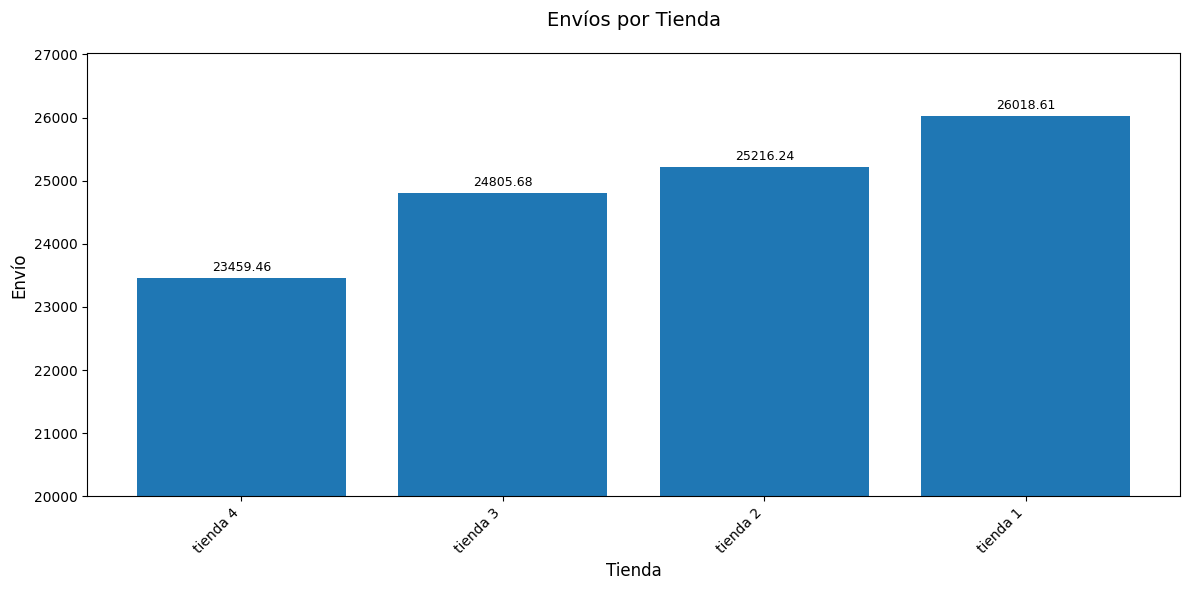

In [ ]:
tienda = df_ordenado_envios['Tienda']
envio = df_ordenado_envios['Envío']

fig, ax = plt.subplots(figsize=(12, 6))

rects = ax.bar(tienda, envio, align='center')

ax.bar_label(rects, fmt='%.2f', padding=3, fontsize=9)

ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Envío', fontsize=12)
ax.set_title('Envíos por Tienda', pad=20, fontsize=14)
plt.ylim(20000, max(envio)+1000)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Conclusión

El conjunto de datos analizado esta conformado por los datos de cuatro tiendas, con el objetivo de determinar cuál tienda debe vender el Sr. Juan, los análisis consistieron en revisar los ingresos de cada una de ellas, así como la calificación que cada cliente proporcionó, en los datos analizados también se consideró el costo de envío.

De manera que las tiendas con mayores ingresos fueron la 1 y 2, con mejor calificación las tiendas 3 y 2, en el caso del menor costo de envío fueron las tiendas 3 y 4, a manera de resumen se presenta la siguiente tabla de los datos de ingresos, calificación y envío.

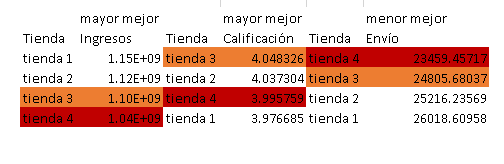

En base a estos resultados se propone que se venda la tienda 4

In [ ]:
def mapa(df):

  mapa = folium.Map(location=[df["lat"].mean(), df["lon"].mean()], zoom_start=6)

  # Datos para el heatmap: lista de listas [lat, lon]
  heat_data = df[["lat", "lon"]].values.tolist()

  # Añadir heatmap al mapa
  HeatMap(heat_data, radius=15).add_to(mapa)

  return mapa.save("heatmap_basico.html")

In [ ]:
mapa_tienda_1 = mapa(df_tienda1)

En la tienda 1

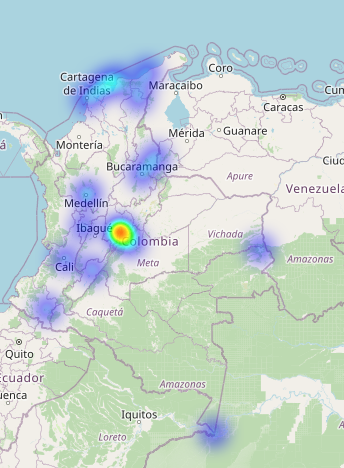

En la tienda 2

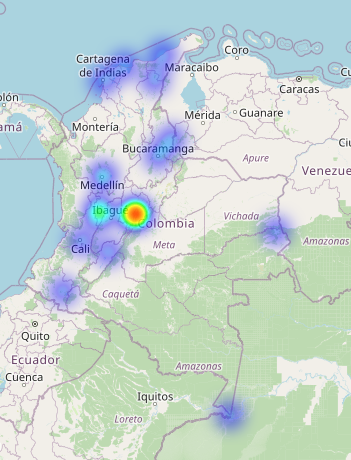

En la tienda 3

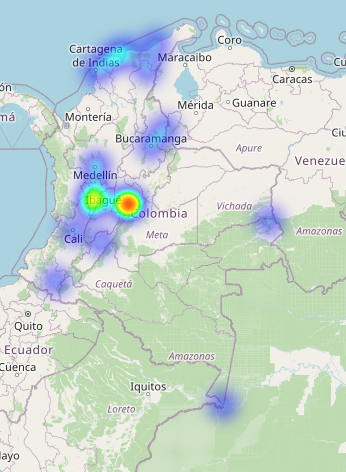

En la tienda 4

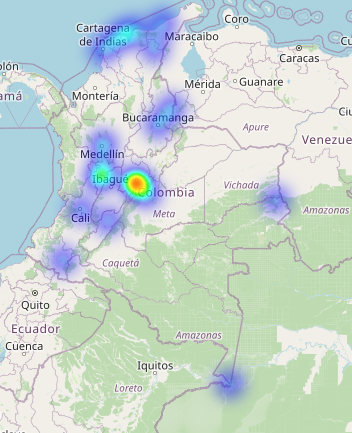